# Week 1 – Statcast Mini-Assignment

Fill in this notebook as you work through your Week 1 assignment.

## Goals
- Load Statcast CSV
- Compute average EV, hard-hit%, launch angle stats
- Create scatterplot of launch angle vs exit velocity
- Write a short analysis of the hitter


## 1. Imports
Run this cell to import libraries.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Load Data
Update the file path to your Statcast CSV inside your `data/` folder.

In [17]:
df = pd.read_csv("nimmo_data.csv")
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,SI,2025-09-28,97.5,-1.18,5.93,"Cabrera, Edward",607043,665795,single,hit_into_play,NaN,NaN,NaN,NaN,4.0,Brandon Nimmo singles on a sharp line drive to...,R,L,R,MIA,NYM,X,7.0,line_drive,1,1,2025,-1.50,0.52,-0.41,2.40,NaN,NaN,NaN,1,4,Top,44.77,100.74,NaN,NaN,NaN,NaN,5.517606,-141.898769,-5.192165,-21.519368,31.192488,-24.212337,3.60,1.73,232.0,110.1,10.0,97.8,2262.0,6.4,776148,640459,676572,669364,681393,672640,691594,805300,681715,54.12,0.897,0.941,0.9,1.0,1.0,0.0,5.0,25,3,Sinker,0,0,0,0,0,0,0,0,Strategic,Standard,229.0,-0.030,0.425,NaN,NaN,1.253,-0.425,110.1,0,0,0.527154,0.472846,27,32,27,32,2,1,5.0,1.0,NaN,NaN,1.87,1.50,-1.50,29.3,NaN,NaN,NaN,NaN,NaN
1,CU,2025-09-28,85.9,-0.97,6.18,"Cabrera, Edward",607043,665795,NaN,ball,NaN,NaN,NaN,NaN,14.0,Ball,R,L,R,MIA,NYM,B,NaN,NaN,0,1,2025,0.87,-0.99,0.41,0.56,NaN,NaN,NaN,1,4,Top,NaN,NaN,NaN,NaN,NaN,NaN,1.509966,-125.008824,-4.989086,8.715449,27.999873,-41.575759,3.42,1.51,NaN,NaN,NaN,85.6,2756.0,6.3,776148,640459,676572,669364,681393,672640,691594,805300,681715,54.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,2,Curveball,0,0,0,0,0,0,0,0,Standard,Standard,36.0,0.000,0.029,NaN,NaN,NaN,-0.029,NaN,0,0,0.527154,0.472846,27,32,27,32,2,1,5.0,1.0,NaN,NaN,4.11,-0.87,0.87,40.9,NaN,NaN,NaN,NaN,NaN
2,SL,2025-09-28,88.5,-1.01,5.95,"Cabrera, Edward",607043,665795,NaN,called_strike,NaN,NaN,NaN,NaN,2.0,Called Strike,R,L,R,MIA,NYM,S,NaN,NaN,0,0,2025,0.15,0.69,0.19,3.06,NaN,NaN,NaN,1,4,Top,NaN,NaN,NaN,NaN,NaN,NaN,2.638115,-128.777122,-2.391419,1.094840,28.602052,-24.221211,3.49,1.75,NaN,NaN,NaN,88.6,2338.0,6.5,776148,640459,676572,669364,681393,672640,691594,805300,681715,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,1,Slider,0,0,0,0,0,0,0,0,Standard,Standard,110.0,0.000,-0.039,NaN,NaN,NaN,0.039,NaN,0,0,0.527154,0.472846,27,32,27,32,2,1,5.0,1.0,NaN,NaN,2.24,-0.15,0.15,33.3,NaN,NaN,NaN,NaN,NaN
3,FF,2025-09-28,97.5,-1.36,5.89,"Cabrera, Edward",607043,665795,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,Brandon Nimmo flies out to left fielder Javier...,R,L,R,MIA,NYM,X,7.0,fly_ball,0,0,2025,-0.86,1.22,-0.14,2.23,NaN,NaN,NaN,0,2,Top,74.96,64.11,NaN,NaN,NaN,NaN,5.262708,-141.701592,-7.100501,-12.785768,33.395431,-14.305695,3.60,1.73,357.0,98.7,23.0,97.3,2374.0,6.3,776148,640459,676572,669364,681393,672640,691594,805300,681715,54.18,0.367,0.501,0.0,1.0,0.0,0.0,5.0,7,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,225.0,0.023,-0.259,NaN,NaN,0.841,0.259,98.7,0,0,0.500000,0.500000,27,32,2

## 3. Explore Columns
Check column names and preview first rows.

In [21]:
list(df.columns)

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'fielder_2',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimated_woba_using_speedangle',
 'w

In [91]:
df.iloc[[1]]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
1,CU,2025-09-28,85.9,-0.97,6.18,"Cabrera, Edward",607043,665795,NaN,ball,NaN,NaN,NaN,NaN,14.0,Ball,R,L,R,MIA,NYM,B,NaN,NaN,0,1,2025,0.87,-0.99,0.41,0.56,NaN,NaN,NaN,1,4,Top,NaN,NaN,NaN,NaN,NaN,NaN,1.509966,-125.008824,-4.989086,8.715449,27.999873,-41.575759,3.42,1.51,NaN,NaN,NaN,85.6,2756.0,6.3,776148,640459,676572,669364,681393,672640,691594,805300,681715,54.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,2,Curveball,0,0,0,0,0,0,0,0,Standard,Standard,36.0,0.0,0.029,NaN,NaN,NaN,-0.029,NaN,0,0,0.527154,0.472846,27,32,27,32,2,1,5.0,1.0,NaN,NaN,4.11,-0.87,0.87,40.9,NaN,NaN,NaN,NaN,NaN


## 4. Filter and Prepare Batted Ball Data
Define your exit velocity and launch angle column names once you inspect your dataset.

In [35]:
# Column Names
ev_col = "launch_speed"
la_col = "launch_angle"


#Filtered Columns
batted = df.dropna(subset=[ev_col, la_col])
batted[[ev_col, la_col]].head()

,launch_speed,launch_angle
0,110.1,10.0
3,98.7,23.0
4,102.8,16.0
5,79.3,65.0
6,65.5,45.0


## 5. Compute Key Metrics

In [67]:
# Average Exit Velocity

avg_ev = batted[ev_col].mean()
avg_ev

84.84831199068682

In [58]:
# Hard Hit Percentages

HARD_HIT = 95
hard_hit_balls = batted.loc[batted[ev_col] >= HARD_HIT]
len(hard_hit_balls)/len(batted)

0.30151338766006985

In [68]:
# Mean Launch Angle

la_mean = batted[la_col].mean()
la_mean

18.26891734575087

In [69]:
# Median Launch Angle

la_median = batted[la_col].median()
la_median

20.0

In [71]:
# Standard Deviation of Launch Angle

la_std = batted[la_col].std()
la_std

32.01075868262443

In [70]:
# Max EV

max_ev = batted[ev_col].max()
max_ev

112.3

In [66]:
# Sweet Spot Percentage

SWEET_SPOT_LOW = 8
SWEET_SPOT_HIGH = 32

sweet_spot_balls = batted.loc[ (batted[la_col] >= SWEET_SPOT_LOW) & (batted[la_col] <= SWEET_SPOT_HIGH)]
len(sweet_spot_balls)/len(batted)


0.29220023282887075

## 6. Scatterplot: Launch Angle vs Exit Velocity

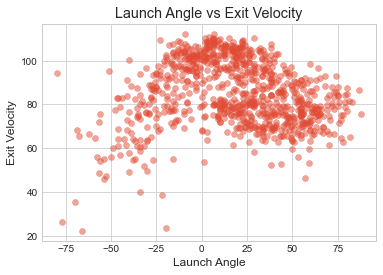

In [89]:
plt.scatter(batted[la_col], batted[ev_col], alpha = 0.5)

# Add labels and title for clarity
plt.xlabel('Launch Angle')
plt.ylabel('Exit Velocity')
plt.title('Launch Angle vs Exit Velocity')

plt.style.use('seaborn-whitegrid')

# Display the plot
plt.show()

## 7. Summary & Interpretation
Write a brief summary of your findings.
- What type of hitter is this?
- Do they elevate the ball?
- Do they hit the ball hard consistently?

Write below:

In 2025, Brandon Nimmo elevated the ball fairly consistently, hitting more balls with a positive launch angle than a negative one. His 30% hard-hit rate was below the league average of roughly 39–40%, suggesting that he doesn’t consistently hit the ball with elite exit velocity. His sweet-spot percentage of 30% is roughly in line with a typical big-league hitter, though his high launch-angle variability (standard deviation of ~32°) indicates a wide range of batted-ball outcomes.

Based solely on his batted-ball data, Nimmo does not appear to sell out for power when he does make contact. However, this dataset does not include swing decisions or contact frequency, so we cannot infer his overall approach at the plate.